In [5]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from IPython.display import HTML
import matplotlib
import matplotlib.animation as animation
matplotlib.rcParams['animation.embed_limit'] =1e12
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [6]:
# Gustavo's default KHTH=300
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH300 
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00032002.nc',decode_times=False)

# Gustavo's default KHTH=2000
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH2000
fs= xr.open_dataset('static.nc', decode_times=False)
av = xr.open_dataset('averages_00032002.nc',decode_times=False)
os = xr.open_dataset('ocean.stats.nc',decode_times=False)


# # MY default KHTH=300 (should be copy of Gustavo's above, just a sanity check since it was my first run)
# %cd /glade/p/univ/unyu0004/eyankovsky/example_elizabeth
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00031502.nc',decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# #PARAMETERIZED GME RUNS:
# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_attempt1
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_dataset('averages_00031502.nc',decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C01
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C1
# %ls
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)

# %cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_default
# fs= xr.open_dataset('static.nc', decode_times=False)
# av = xr.open_mfdataset(['averages_00030002.nc','averages_00030502.nc','averages_00031002.nc','averages_00031502.nc'],decode_times=False)
# os = xr.open_dataset('ocean.stats.nc',decode_times=False)


# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_dataset('ocean.stats.nc', decode_times=False)
# av = xr.open_dataset('averages_00006002.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/KHTH_constant/nw2_0.5deg_N15_KHTH2000
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [8]:
print(av.h)

<xarray.DataArray 'h' (time: 100, zl: 15, yh: 280, xh: 120)>
[50400000 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 0.25 0.75 1.25 1.75 2.25 ... 58.25 58.75 59.25 59.75
  * yh       (yh) float64 -69.75 -69.25 -68.75 -68.25 ... 68.75 69.25 69.75
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 3.2e+04 3.201e+04 3.201e+04 ... 3.249e+04 3.25e+04
Attributes:
    long_name:      Layer Thickness
    units:          m
    cell_methods:   area:mean zl:sum yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT


In [11]:
eta = av.h.sum('zl')-(av.h.sum('zl')).mean('time')
xh = av.h.xh
yh = av.h.yh

Text(0.5, 1.0, 'm')

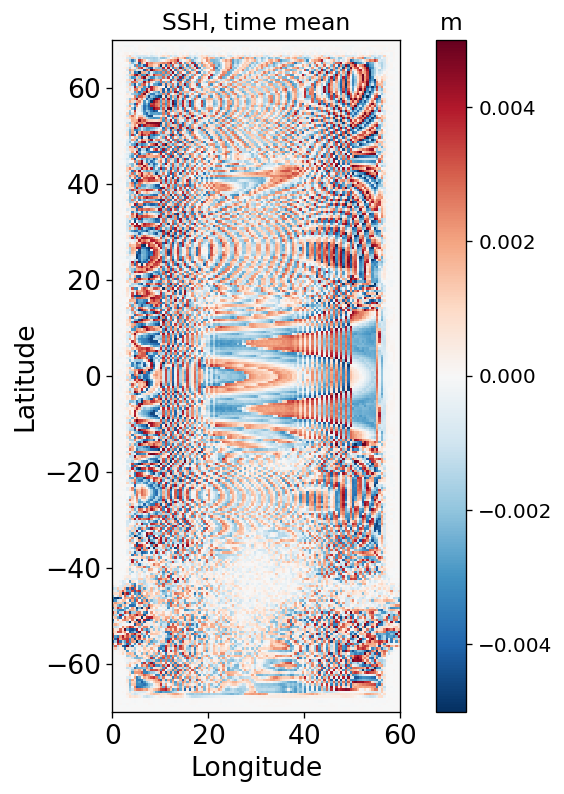

In [15]:
fig = plt.figure(figsize=(5, 8), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])

ax1.set_xlabel('Longitude',fontsize=16); ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

quad1=ax1.pcolormesh(xh,yh,eta.mean('time'),cmap='RdBu_r',vmin=-.005,vmax=.005,shading='goaround')
cb1 = fig.colorbar(quad1,ax2)
ax1.set_title('SSH, time mean', fontsize=14)
ax1.set_aspect('equal')
ax2.set_title('m', fontsize=14)



In [3]:
# fig = plt.figure(figsize=(5, 8), dpi= 120, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
# ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])

# ax1.set_xlabel('Longitude',fontsize=16); ax1.set_ylabel('Latitude',fontsize=16)
# ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
# %mkdir GM2000
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/GM2000
# for i in range(0,100):
#     print(i)
#     quad1=ax1.pcolormesh(xh,yh,np.array(eta[i,:,:]),cmap='RdBu_r',vmin=-.05,vmax=.05,shading='goaround')
#     cb1 = fig.colorbar(quad1,ax2)
#     ax1.set_title('SSH, day=%i ' %(i*5), fontsize=14)
#     ax1.set_aspect('equal')
#     ax2.set_title('m', fontsize=14)
#     plt.savefig('index%.3d'%i)
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

In [4]:
# fig = plt.figure(figsize=(6, 5), dpi= 120, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.12,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
# ax2 = fig.add_axes([.8, 0.12, 0.05, 0.7])

# ax1.set_xlabel('Longitude',fontsize=16); ax1.set_ylabel('Latitude',fontsize=16)
# ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
# %mkdir GM2000N
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/GM2000N
# for i in range(0,100):
#     print(i)
#     quad1=ax1.pcolormesh(xh,yh,np.array(eta[i,:,:]),cmap='RdBu_r',vmin=-.025,vmax=.025,shading='goaround')
#     ax1.set_ylim([0,70])
#     cb1 = fig.colorbar(quad1,ax2)
#     ax1.set_title('SSH, day=%i ' %(i*5), fontsize=14)
#     ax1.set_aspect('equal')
#     ax2.set_title('m', fontsize=14)
#     plt.savefig('index%.3d'%i)
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/